# EDA

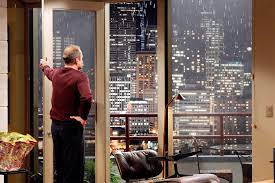

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
from geopy.distance import geodesic
from scipy.stats import pearsonr
import optbinning as op
from scipy import stats


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from cleaning import clean_data

In [2]:
df = pd.read_csv("data/_select_kchd_kchs_date_kchs_price_from_king_county_house_details_202512091053.csv")

In [3]:
df.shape

(21597, 21)

In [4]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [5]:
df.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

<Axes: >

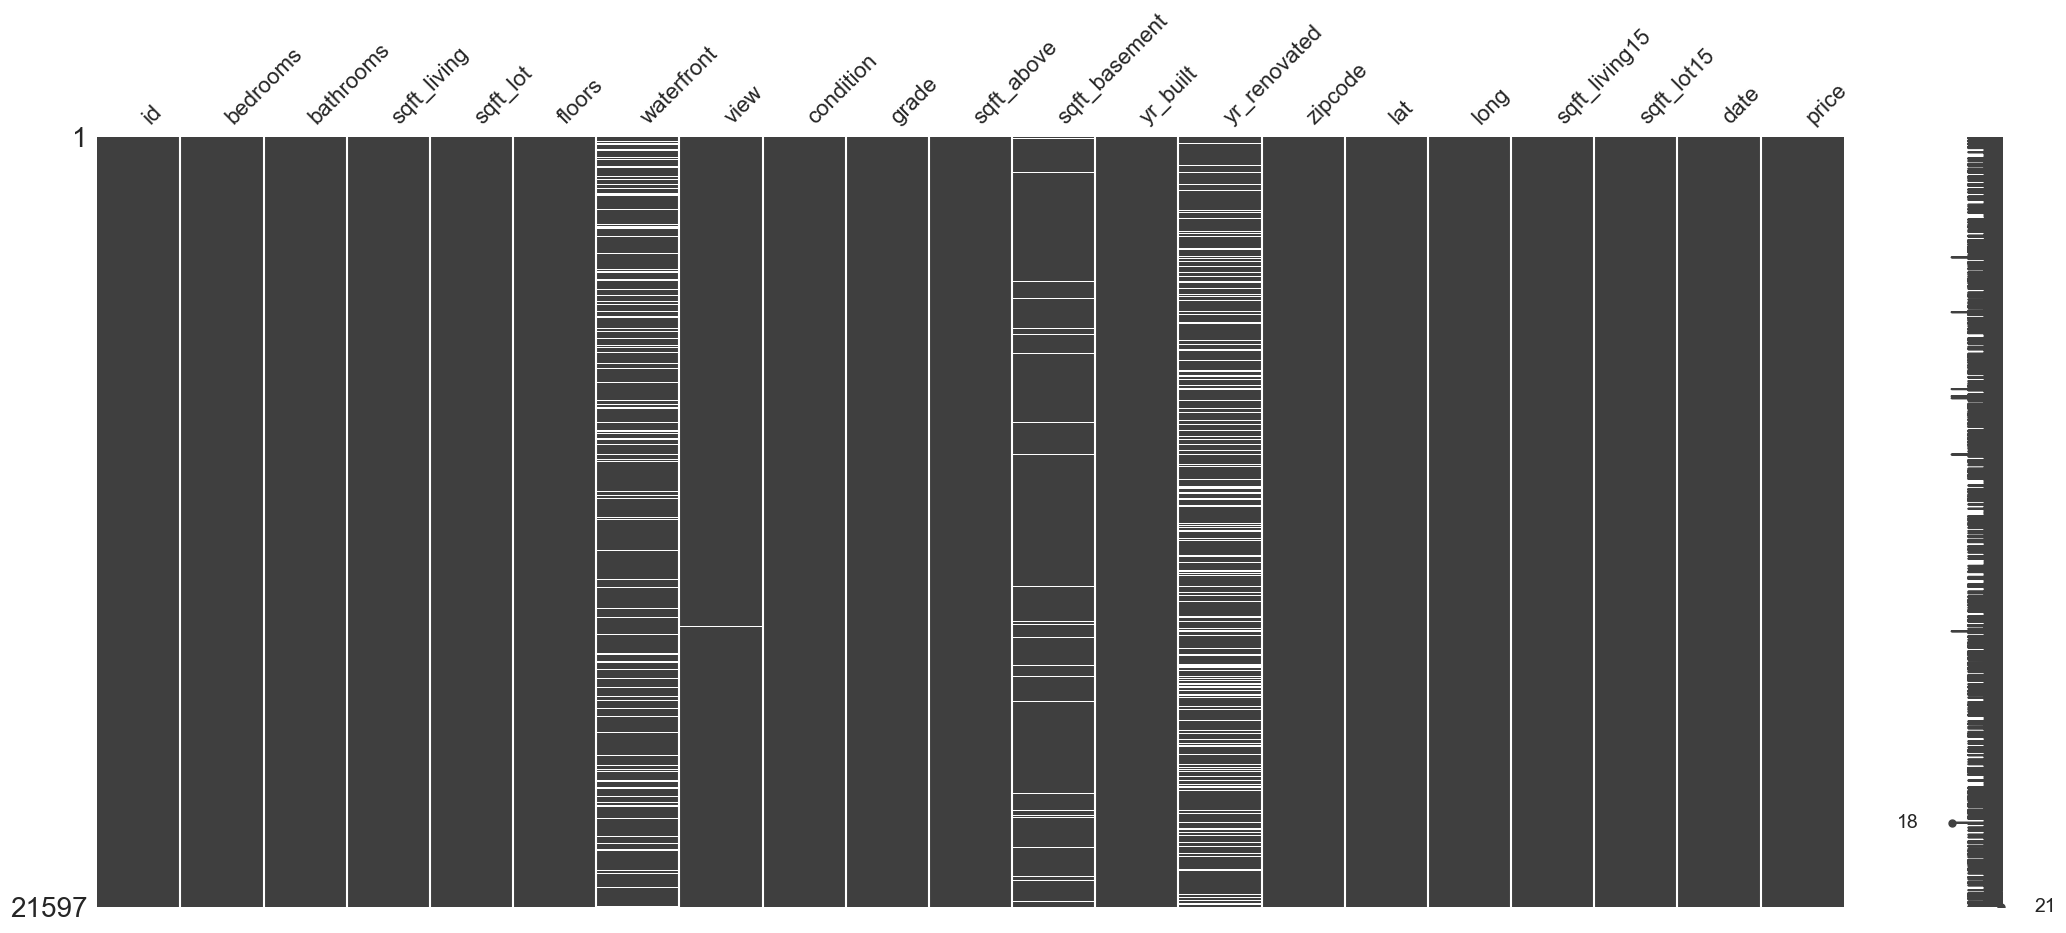

In [6]:
msno.matrix(df)

In [7]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [8]:
df.shape

(21597, 21)

In [9]:
df = clean_data(df)

In [10]:
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

In [11]:
df.dtypes

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                     int64
dtype: object

In [12]:
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650       1           0   
1  6414100192         3      2.250         2570      7242       2           0   
2  5631500400         2      1.000          770     10000       1           0   
3  2487200875         4      3.000         1960      5000       1           0   
4  1954400510         3      2.000         1680      8080       1           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode    lat     long  sqft_living15  sqft_lot15       date   price  
0    98178 47.511 -122.257           1340        5650 2014-10-13  221900  
1    98125 47.721 -122.319           1690        7639 2014-12-09  538000  
2    98028 47.738 -122.233           2720        8062 2015-02-25  180000  
3    98136 47.521 -122.393           1360        5000 2014-12-09  604000  
4    98074 47.617 -122.045           1800        7503 2015-02-18  510000  

[5 rows x 21 columns]

In [13]:
df["distance_miles"] = df.apply(
    lambda r: geodesic(
        (r["lat"], r["long"]),
        (47.604, -122.334)
    ).miles,
    axis=1
)

In [14]:
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650       1           0   
1  6414100192         3      2.250         2570      7242       2           0   
2  5631500400         2      1.000          770     10000       1           0   
3  2487200875         4      3.000         1960      5000       1           0   
4  1954400510         3      2.000         1680      8080       1           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode    lat  \
0     0          3      7  ...      1955             0    98178 47.511   
1     0          3      7  ...      1951          1991    98125 47.721   
2     0          3      6  ...      1933             0    98028 47.738   
3     0          5      7  ...      1965             0    98136 47.521   
4     0          3      8  ...      1987             0    98074 47.617   

      long  sqft_living15  sqft_lot15       date   price distance_miles  
0 -122.257           1340        5650 2014-10-13  221900          7.353  
1 -122.319           1690        7639 2014-12-09  538000          8.113  
2 -122.233           2720        8062 2015-02-25  180000         10.382  
3 -122.393           1360        5000 2014-12-09  604000          6.376  
4 -122.045           1800        7503 2015-02-18  510000         13.530  

[5 rows x 22 columns]

In [15]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'distance_miles'],
      dtype='object')

# Hypothesis 1 : Lot size and neighboring lot sizes are similar

In [16]:
pearson_hypothesis1 = df["sqft_lot"].corr(df["sqft_lot15"])

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(df["sqft_lot"], df["sqft_lot15"], alpha=0.5, color='violet')

ax.set_aspect("equal", adjustable="box")
ax.ticklabel_format(axis="y", style="sci", scilimits=(6, 6))
ax.ticklabel_format(axis="x", style="sci", scilimits=(6, 6))
ax.set_xlabel("size of lot (million sqft)")
ax.set_ylabel("average size of neighborhood lots (million sqft)")
ax.set_xlim(0, 800000)
ax.set_ylim(0, 800000)
ax.set_title(f"Lot size vs average neighborhood lot size\nCorrelation: {pearson_hypothesis1:.2f}")

#plt.savefig("hypo1scatter")
plt.show()

In [18]:
#Hypothesis Testing
#H0: There is no linear correlation between sqft_lot and sqft_lot15
#H1: There is a linear correlation between sqft_lot and sqft_lot15

x_hyph1 = df["sqft_lot"]
y_hyph1 = df["sqft_lot15"]

corr1, p_value1 = pearsonr(x_hyph1, y_hyph1)

corr1, p_value1

alpha1 = 0.05

if p_value1 < alpha1:
    print("There is a linear correlation between sqft_lot and sqft_lot15")
else:
    print("There is no linear correlation between sqft_lot and sqft_lot15")

There is a linear correlation between sqft_lot and sqft_lot15


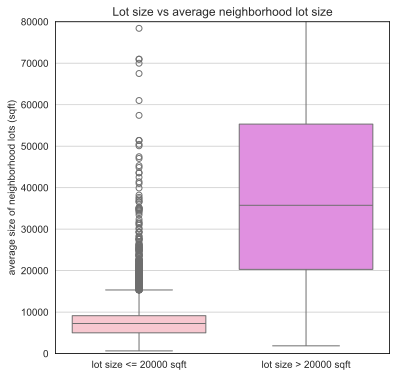

In [19]:
threshold = 20000

# Filter data
greater_than = df[df['sqft_lot'] > threshold]['sqft_lot15']
lesser_than = df[df['sqft_lot'] <= threshold]['sqft_lot15']

fig, ax = plt.subplots(figsize=(6, 6))

# Combine into a new DataFrame for plotting
boxplot_df = pd.DataFrame({
    f'lot size <= {threshold} sqft': lesser_than,
    f'lot size > {threshold} sqft': greater_than
})

# Draw box plot
sns.boxplot(data=boxplot_df, palette=['pink', 'violet'])
plt.ylabel('average size of neighborhood lots (sqft)')
plt.ylim(0,80000)
plt.title("Lot size vs average neighborhood lot size")
#plt.savefig("hypo1box")
plt.show()

In [20]:
#check if variances are significantly different
# Levene's test for equal variances
stat12, p_value12 = stats.levene(lesser_than, greater_than)

print(f"Levene statistic: {stat12:.3f}, p-value: {p_value12:.3f}")

if p_value12 < 0.05:
    print("Reject H0: Variances are significantly different")
else:
    print("Fail to reject H0: No significant difference in variance")

Levene statistic: 5581.139, p-value: 0.000
Reject H0: Variances are significantly different


In [21]:
#check if means are significantly different
# Two-sample t-test
stat13, p_value13 = stats.ttest_ind(lesser_than, greater_than, equal_var=False)

print(f"T-statistic: {stat13:.3f}, p-value: {p_value13:.3f}")

if p_value13 < 0.05:
    print("Reject H0: Means are significantly different")
else:
    print("Fail to reject H0: No significant difference in means")

T-statistic: -35.206, p-value: 0.000
Reject H0: Means are significantly different


# Hypothesis 2: Larger lot sizes are further away from the city center

In [22]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'distance_miles'],
      dtype='object')

In [23]:
pearson_hypothesis2 = df["sqft_lot"].corr(df["distance_miles"])

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(df["sqft_lot"], df["distance_miles"], alpha=0.5, color = 'blue')

ax.set_xlabel("size of lot (sqft)")
ax.set_ylabel("distance from Seattle city center (miles)")
ax.set_xlim(0, 100000)
ax.set_ylim(0, 50)
ax.set_title(f"Lot size vs distance from city center\nCorrelation: {pearson_hypothesis2:.2f}")

#plt.savefig("hypo2scatter")
plt.show()

In [25]:
#Hypothesis Testing
#H0: There is no linear correlation between sqft_lot and distance_miles
#H1: There is a linear correlation between sqft_lot and distance_miles

x_hyph2 = df["sqft_lot"]
y_hyph2 = df["distance_miles"]

corr2, p_value2 = pearsonr(x_hyph2, y_hyph2)

corr2, p_value2

alpha2 = 0.05

if p_value2 < alpha2:
    print("There is a linear correlation between sqft_lot and distance_miles")
else:
    print("There is no linear correlation between sqft_lot and distance_miles")

There is a linear correlation between sqft_lot and distance_miles


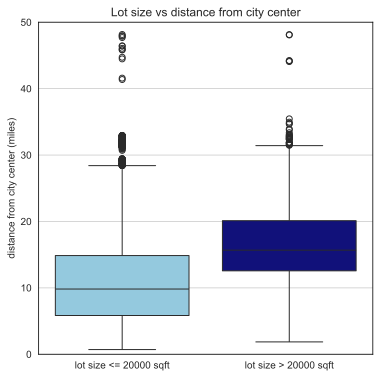

In [26]:
threshold2 = 20000

# Filter data
greater_than2 = df[df['sqft_lot'] > threshold2]['distance_miles']
lesser_than2 = df[df['sqft_lot'] <= threshold2]['distance_miles']

fig, ax = plt.subplots(figsize=(6, 6))

# Combine into a new DataFrame for plotting
boxplot_df2 = pd.DataFrame({
    f'lot size <= {threshold2} sqft': lesser_than2,
    f'lot size > {threshold2} sqft': greater_than2
})

# Draw box plot
sns.boxplot(data=boxplot_df2, palette=['skyblue', 'darkblue'])
plt.ylabel('distance from city center (miles)')
plt.ylim(0,50)
plt.title("Lot size vs distance from city center")
#plt.savefig("hypo2box")
plt.show()

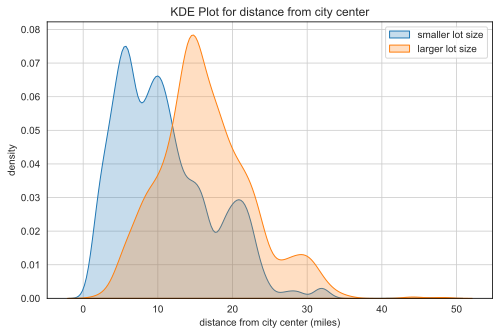

In [27]:
sns.kdeplot(lesser_than2, fill=True, label='smaller lot size')
sns.kdeplot(greater_than2, fill=True, label='larger lot size')

plt.legend()
plt.xlabel("distance from city center (miles)")
plt.ylabel("density")
plt.title("KDE Plot for distance from city center")
#plt.savefig("hypo2kde")
plt.show()

# Hypothesis 3: Luxury houses have higher lot sizes

In [28]:
def cat_cat_correlation(df_,cat_col1,cat_col2):
    """
    This function spits out Cramer's correlation statistic, with Bergsma-Wicher 
    correction, between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df_[cat_col1], df_[cat_col2])
    chi_sqr = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

In [29]:
#creating new feature
df['luxury'] = df['grade'] > 11

def cat_num_correlation(df_,cat_col,num_col):
    """
    This function spits out a sensible correlation coefficient
    between a categorical column and a numerical column of a dataframe.
    The correlation is essentially the corrected Cramer's correlation statistic,
    after the numerical data points have been transformed under optimal binning
    """
    _df = df_.copy()
    class_number = _df[cat_col].nunique()
    binning = op.MulticlassOptimalBinning()
    _df['binned_feature'] =binning.fit_transform(_df[num_col], _df[cat_col])
    result = cat_cat_correlation(_df,cat_col,'binned_feature')
    return round(result,3)

#calculating cramers v correlation
cramers_v_correlation = cat_num_correlation(df,'luxury','sqft_lot')

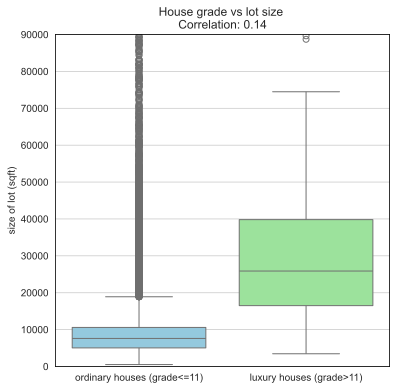

In [30]:
threshold_grade = 11

# Filter data
greater_than = df[df['grade'] > threshold_grade]['sqft_lot']
lesser_than = df[df['grade'] <= threshold_grade]['sqft_lot']

fig, ax = plt.subplots(figsize=(6, 6))

# Combine into a new DataFrame for plotting
boxplot_df = pd.DataFrame({
    f'ordinary houses (grade<={threshold_grade})': lesser_than,
    f'luxury houses (grade>{threshold_grade})': greater_than
})

# Draw box plot
sns.boxplot(data=boxplot_df, palette=['skyblue', 'lightgreen'])
plt.ylabel('size of lot (sqft)')
plt.ylim(0,90000)
plt.title(f"House grade vs lot size \nCorrelation: {cramers_v_correlation:.2f}")
#plt.savefig("hypo3box")
plt.show()

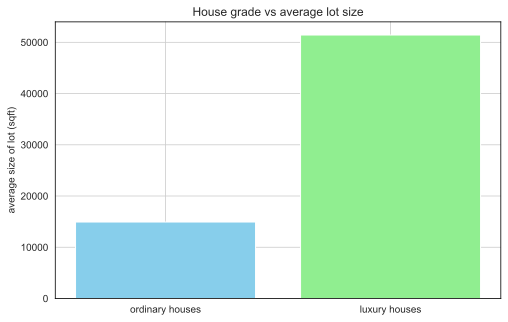

In [31]:
# Example data
categories = ['ordinary houses', 'luxury houses']
values = [df[df['grade'] <= threshold_grade]['sqft_lot'].mean(), df[df['grade'] > threshold_grade]['sqft_lot'].mean()]

# Create bar plot
plt.bar(categories, values, color=['skyblue', 'lightgreen'])
plt.ylabel('average size of lot (sqft)')
plt.title('House grade vs average lot size')
#plt.savefig("hypo3bar")
plt.show()

In [32]:
#check if variances are significantly different
luxury = df[df['luxury'] == True]['sqft_lot']
non_luxury = df[df['luxury'] == False]['sqft_lot']

# Levene's test for equal variances
stat31, p_value31 = stats.levene(luxury, non_luxury)

print(f"Levene statistic: {stat31:.3f}, p-value: {p_value31:.3f}")

if p_value31 < 0.05:
    print("Reject H0: Variances are significantly different")
else:
    print("Fail to reject H0: No significant difference in variance")

Levene statistic: 37.343, p-value: 0.000
Reject H0: Variances are significantly different


In [33]:
#check if means are significantly different
# Two-sample t-test
stat32, p_value32 = stats.ttest_ind(luxury, non_luxury, equal_var=False)

print(f"T-statistic: {stat32:.3f}, p-value: {p_value32:.3f}")

if p_value32 < 0.05:
    print("Reject H0: Means are significantly different")
else:
    print("Fail to reject H0: No significant difference in means")

T-statistic: 3.581, p-value: 0.001
Reject H0: Means are significantly different
